**Exploratory Data Analysis of the Data (EDA)**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#PARAMS
local_image_size_x = 30
local_image_size_y = 30
PREVIOUS_TIMESTEP = 24 # 24 hour concatenated previous time input
PREDICTION_TIMESTEP = 1 # 1 hour prediction
BATCHSIZE = 256 #1129
LOSS = 'mse'
OPTIMIZER = 'adam'
EPOCH = 600
LEARN = 5e-04
WEIGHT_DECAY = 5e-05
TRAIN_RATIO = 0.8

In [3]:
base_directory = os.getcwd()
data_path = os.path.join(base_directory)

region_path = os.path.join(data_path, 'NYC_Taxi_JuneFinal_30x30.npy')
# temporal_path = os.path.join(data_path, 'Temporal_Master_Grid_NYC30x30(60_min_resolution).npy')

region = np.load(region_path)
# temporal = np.load(temporal_path)

In [4]:
print("Region Shape:", region.shape)
# print("Temporal Shape:", temporal.shape)
print("Region Data Types:", region.dtype)
# print("Temporal Data Types:", temporal.dtype)

Region Shape: (4344, 30, 30, 1)
Region Data Types: int32


In [5]:
# Temporal

# frame_index = 0
# # Plot a single frame
# plt.figure(figsize=(6, 6))
# plt.imshow(temporal[frame_index, :, :, 0], cmap='gray')
# plt.colorbar()
# plt.title(f"Temporal Data - Frame {frame_index}")
# plt.show()

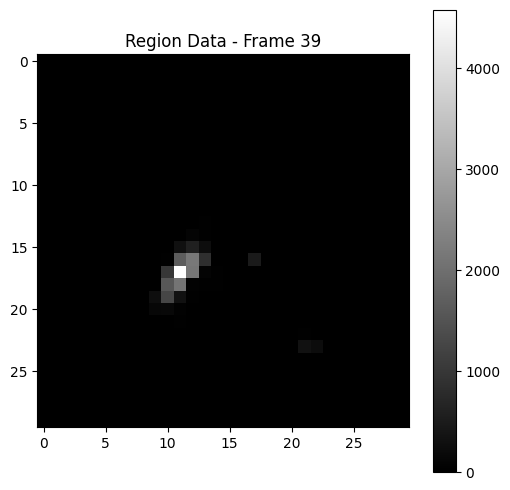

In [6]:
# Region

frame_index = 39
# Plot a single frame
plt.figure(figsize=(6, 6))
plt.imshow(region[frame_index, :, :, 0], cmap='gray')
plt.colorbar()
plt.title(f"Region Data - Frame {frame_index}")
plt.show()

In [7]:
# temporal = np.array(temporal)
region = np.transpose(region, (0, 3, 1, 2))
# print("TEMPORAL FILE SHAPE:", temporal.shape)
print("SPATIAL/REGION FILE SHAPE:", region.shape)

SPATIAL/REGION FILE SHAPE: (4344, 1, 30, 30)


SPATIAL/REGION SHAPE: (4344, 900)


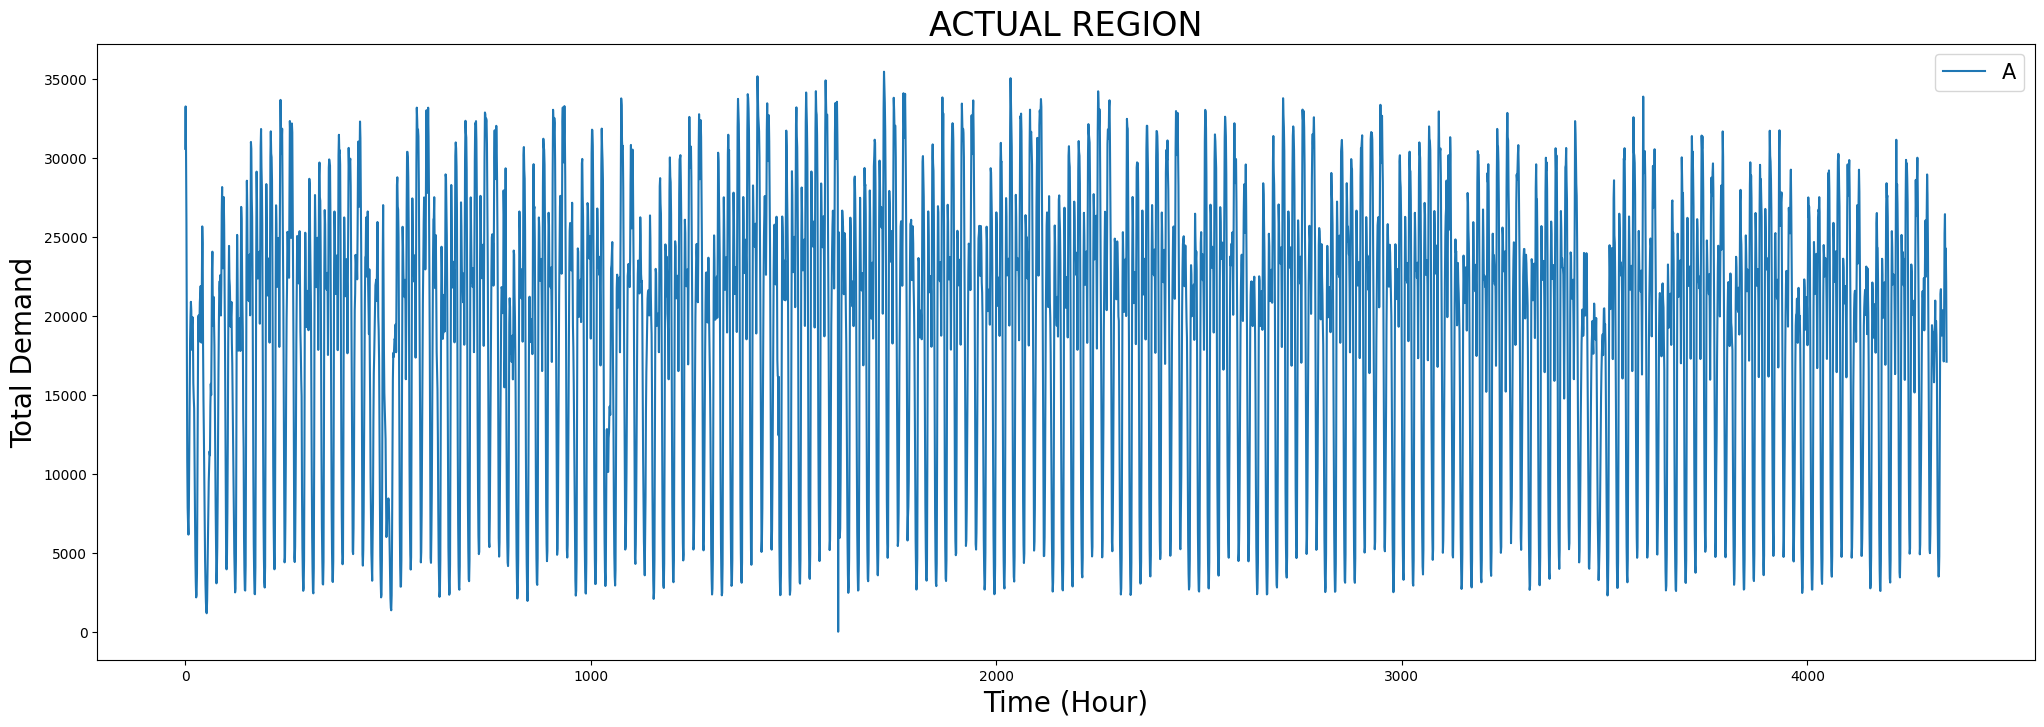

In [8]:
reshaped_reg = np.sum(region, axis=1).reshape(region.shape[0], local_image_size_x * local_image_size_y)
print("SPATIAL/REGION SHAPE:", reshaped_reg.shape)

plt.figure(figsize=(25, 8))
plt.title('ACTUAL REGION', fontsize=24)
plt.plot(np.sum(reshaped_reg, axis=1))
# plt.plot(np.sum(reshaped_pred, axis=1))
# plt.legend(['Actual', 'Predicted'], fontsize=15)
plt.legend('Actual', fontsize=15)
plt.ylabel('Total Demand', fontsize=20)
plt.xlabel('Time (Hour)', fontsize=20)
plt.show()

In [9]:
# reshaped_temp = np.sum(temporal, axis=1).reshape(temporal.shape[0], local_image_size_x * local_image_size_y)
# print("TEMPORAL SHAPE:", reshaped_temp.shape)

# plt.figure(figsize=(25, 8))
# plt.title('ACTUAL TEMPORAL', fontsize=24)
# plt.plot(np.sum(reshaped_temp, axis=1))
# # plt.plot(np.sum(reshaped_pred, axis=1))
# # plt.legend(['Actual', 'Predicted'], fontsize=15)
# plt.legend('Actual', fontsize=15)
# plt.ylabel('Total Demand', fontsize=20)
# plt.xlabel('Time (Hour)', fontsize=20)
# plt.show()

In [10]:
def data_slider(data, type_of_data, previous_time_input=PREVIOUS_TIMESTEP, prediction_of_time=PREDICTION_TIMESTEP):
    data = np.array(data)
    data_array = []
    for i in range(np.shape(data)[0] - (previous_time_input + prediction_of_time) + 1):
        temp = data[i:i + previous_time_input]
        data_array.append(temp)
    data_array = np.array(data_array)
    return data_array

In [11]:
region_data = data_slider(region, "Spatial")
region_data = region_data.reshape((region_data.shape[0], PREVIOUS_TIMESTEP, local_image_size_x, local_image_size_y))
# temporal_data = data_slider(temporal,"Temporal")

print(f"Region data shape: {region_data.shape}")
# print(f"Additional data shape: {temporal_data.shape}")

y_true = []
for i in range(np.shape(region)[0] - (PREVIOUS_TIMESTEP + PREDICTION_TIMESTEP) + 1):
    temp = region[i + PREVIOUS_TIMESTEP:i + (PREVIOUS_TIMESTEP + PREDICTION_TIMESTEP)]
    y_true.append(temp)
y_true = np.array(y_true)

print(f"y_true original shape: {y_true.shape}")

y_true = y_true.reshape((y_true.shape[0], PREDICTION_TIMESTEP*local_image_size_x*local_image_size_y))

print(f"y_true after reshape: {y_true.shape}")

Region data shape: (4320, 24, 30, 30)
y_true original shape: (4320, 1, 1, 30, 30)
y_true after reshape: (4320, 900)


In [12]:
# Train-Test Split

trainx_1 = region_data[:int(np.shape(region_data)[0]*TRAIN_RATIO)]
testx_1 = region_data[int(np.shape(region_data)[0]*TRAIN_RATIO):]
# trainx_2 = temporal_data[:int(np.shape(region_data)[0]*TRAIN_RATIO)]
# testx_2 = temporal_data[int(np.shape(region_data)[0]*TRAIN_RATIO):]
ytrain = y_true[:int(np.shape(region_data)[0]*TRAIN_RATIO)]
ytest = y_true[int(np.shape(region_data)[0]*TRAIN_RATIO):]

print(f"trainx_1(region train) Shape: {trainx_1.shape}")
print(f"testx_1(region test) Shape: {testx_1.shape}")
# print(f"trainx_2(temporal train) Shape: {trainx_2.shape}")
# print(f"testx_2(temporal test) Shape: {testx_2.shape}")
print(f"ytrain(true region train) Shape: {ytrain.shape}")
print(f"ytest(true region test) Shape: {ytest.shape}")

trainx_1(region train) Shape: (3456, 24, 30, 30)
testx_1(region test) Shape: (864, 24, 30, 30)
ytrain(true region train) Shape: (3456, 900)
ytest(true region test) Shape: (864, 900)


In [13]:
trainx_1, valx_1, ytrain, val_y = train_test_split(trainx_1, ytrain, train_size=TRAIN_RATIO,
                                                                     random_state=42, shuffle=True)


print("-"*100)
print("Training Data: ")
print("Regional data training shape:", trainx_1.shape)
# print("Temporal data training shape:", trainx_2.shape)
print("True values Training shape:  ", ytrain.shape)
print("-"*100)

print("Val Data: ")
print("Regional data Validation shape:", valx_1.shape)
# print("Temporal data Validation shape:", valx_2.shape)
print("True values Validation shape:  ", val_y.shape)
print("-"*100)

----------------------------------------------------------------------------------------------------
Training Data: 
Regional data training shape: (2764, 24, 30, 30)
True values Training shape:   (2764, 900)
----------------------------------------------------------------------------------------------------
Val Data: 
Regional data Validation shape: (692, 24, 30, 30)
True values Validation shape:   (692, 900)
----------------------------------------------------------------------------------------------------


SPATIAL/REGION TRAIN SHAPE: (2764, 900)


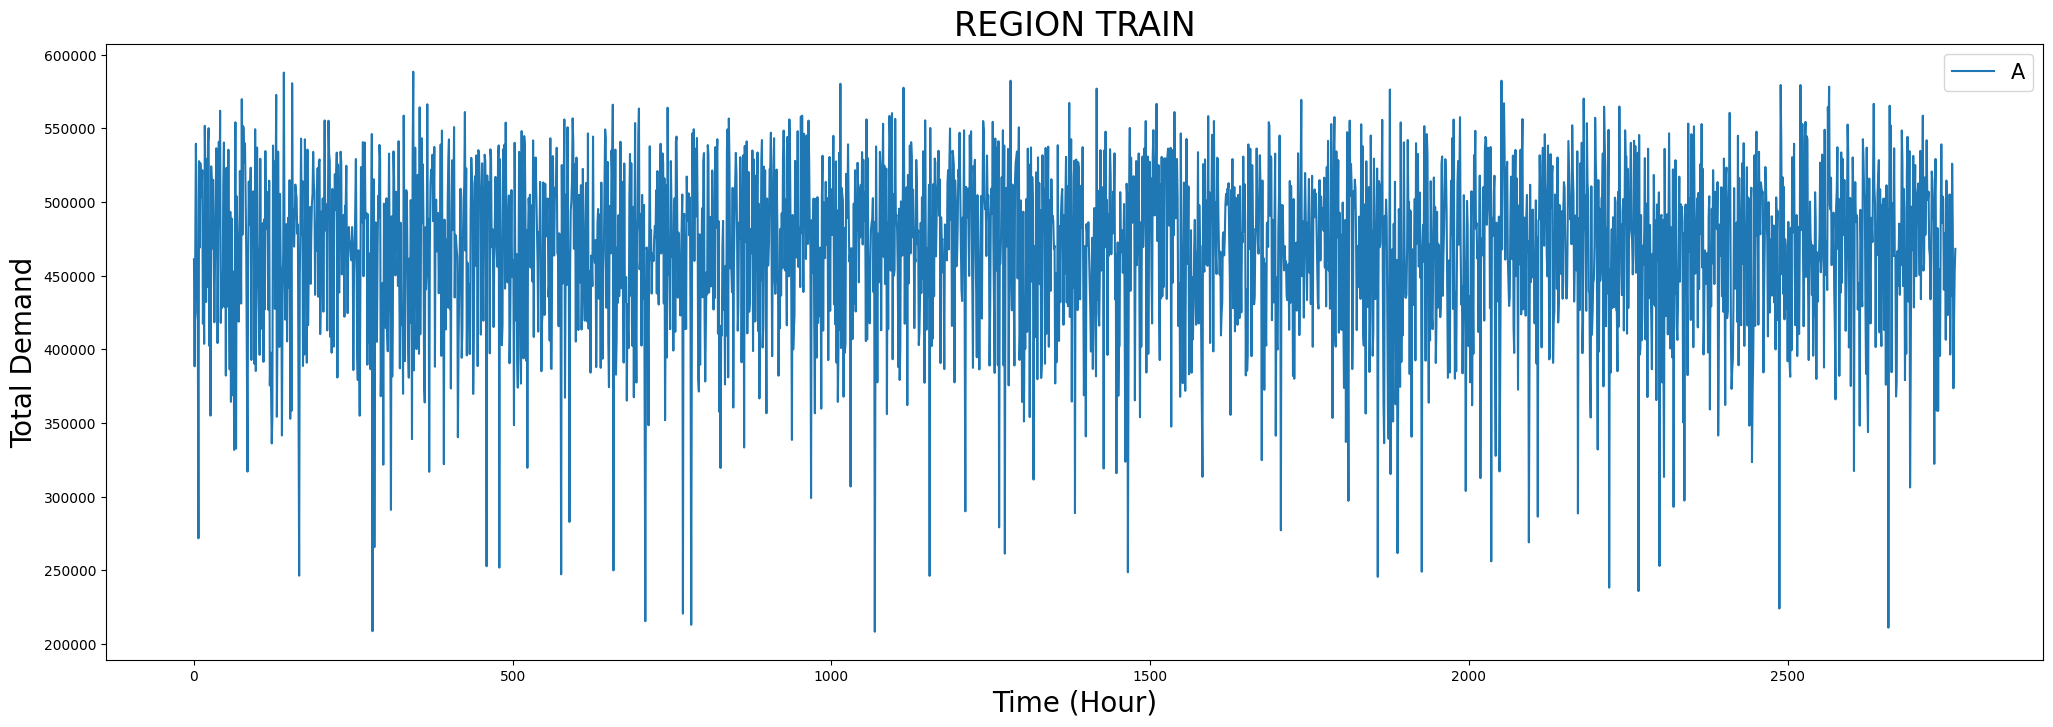

In [14]:
reshaped_reg_train = np.sum(trainx_1, axis=1).reshape(trainx_1.shape[0], local_image_size_x * local_image_size_y)
print("SPATIAL/REGION TRAIN SHAPE:", reshaped_reg_train.shape)

plt.figure(figsize=(25, 8))
plt.title('REGION TRAIN', fontsize=24)
plt.plot(np.sum(reshaped_reg_train, axis=1))
plt.legend('Actual', fontsize=15)
plt.ylabel('Total Demand', fontsize=20)
plt.xlabel('Time (Hour)', fontsize=20)
plt.show()

SPATIAL/REGION VAL SHAPE: (692, 900)


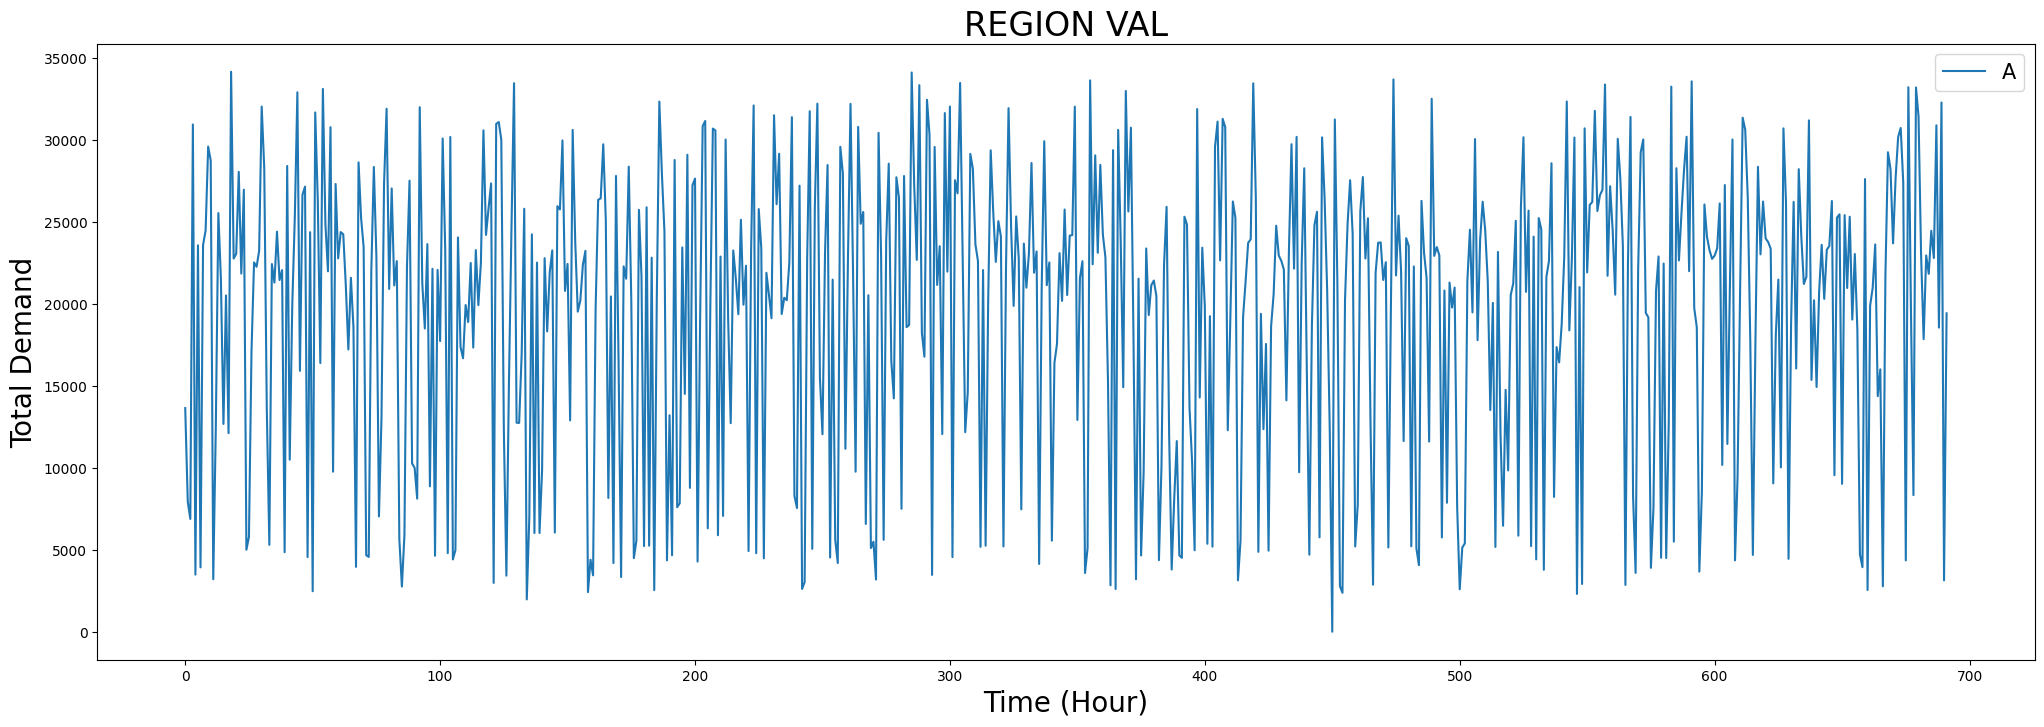

In [15]:
reshaped_reg_val = np.sum(valx_1, axis=1).reshape(valx_1.shape[0], local_image_size_x * local_image_size_y)
print("SPATIAL/REGION VAL SHAPE:", reshaped_reg_val.shape)

plt.figure(figsize=(25, 8))
plt.title('REGION VAL', fontsize=24)
plt.plot(np.sum(val_y, axis=1))
plt.legend('Actual', fontsize=15)
plt.ylabel('Total Demand', fontsize=20)
plt.xlabel('Time (Hour)', fontsize=20)
plt.show()

SPATIAL/REGION TRAIN SHAPE: (864, 900)


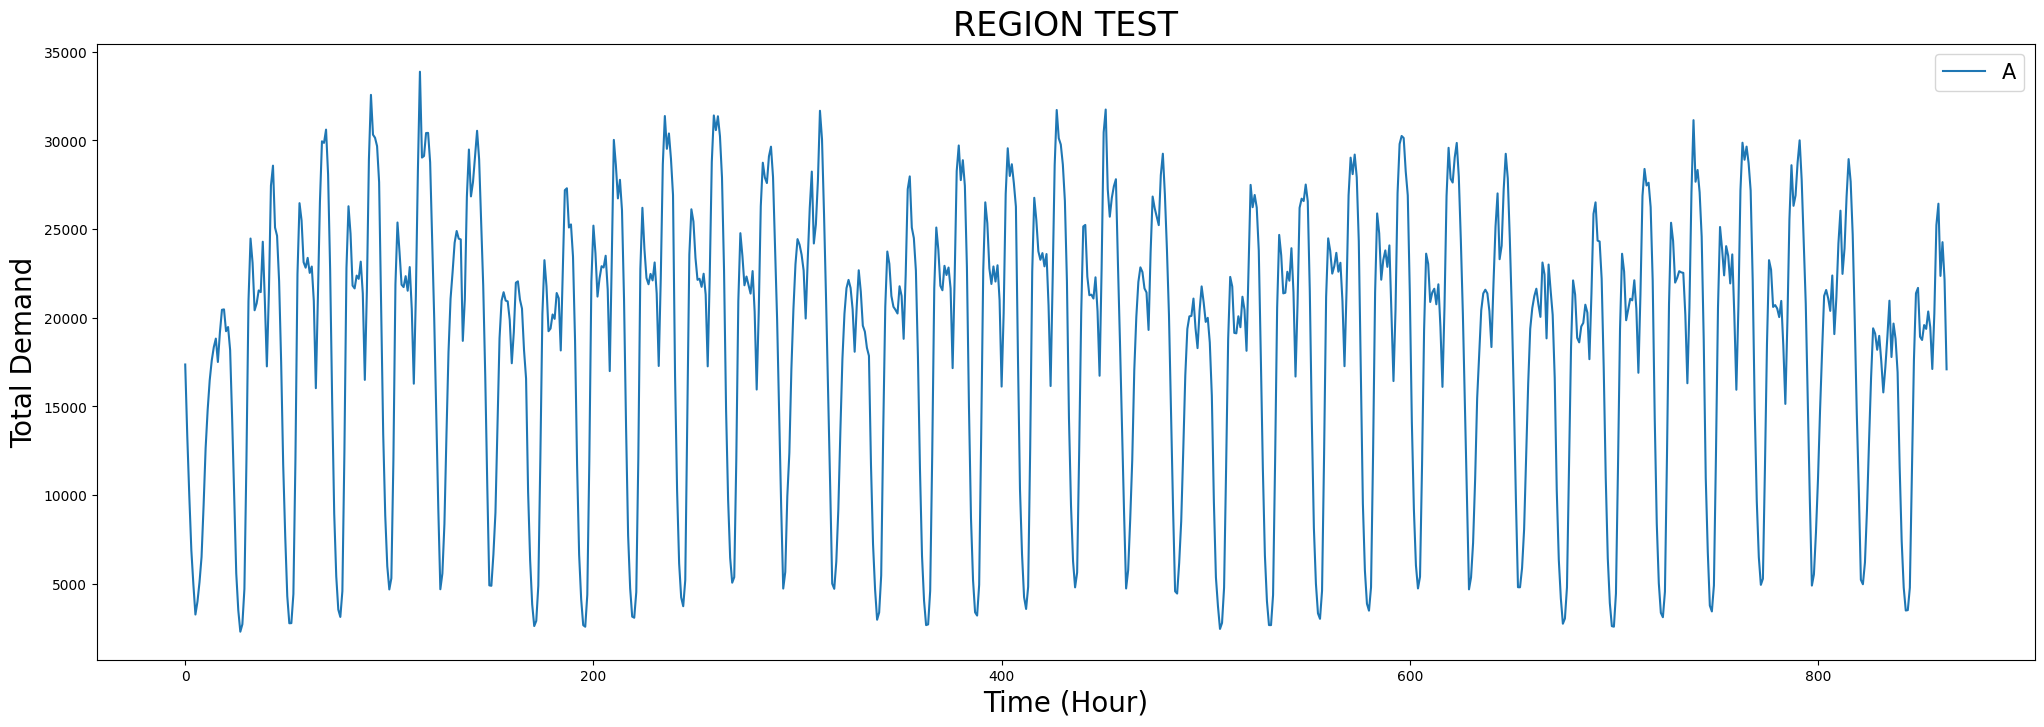

In [16]:
reshaped_reg_test = np.sum(testx_1, axis=1).reshape(testx_1.shape[0], local_image_size_x * local_image_size_y)
print("SPATIAL/REGION TRAIN SHAPE:", reshaped_reg_test.shape)

plt.figure(figsize=(25, 8))
plt.title('REGION TEST', fontsize=24)
plt.plot(np.sum(ytest, axis=1))
plt.legend('Actual', fontsize=15)
plt.ylabel('Total Demand', fontsize=20)
plt.xlabel('Time (Hour)', fontsize=20)
plt.show()

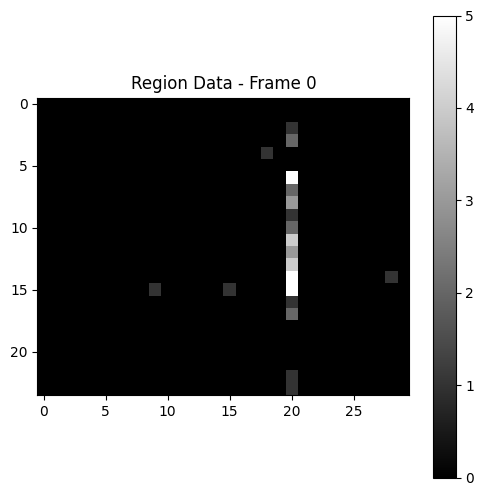

In [17]:
frame_index = 0
# Plot a single frame
plt.figure(figsize=(6, 6))
plt.imshow(trainx_1[frame_index, :, :, 0], cmap='gray')
plt.colorbar()
plt.title(f"Region Data - Frame {frame_index}")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import math

def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true).flatten(), np.array(y_pred).flatten()
    mape = []
    for i in range(len(y_true)):
        if (y_true[i] == 0):
            mape.append(abs(y_pred[i]) * 100)
        else:
            mape.append((np.abs((y_true[i] - y_pred[i]) / y_true[i]) * 100))
    return np.mean(mape)

def MAPE2(y_true, y_pred):
    y_true = np.sum(y_true, axis=-1)
    y_pred = np.sum(y_pred, axis=-1)
    mape = []
    for i in range(np.shape(y_true)[0]):
        mape.append((np.abs((y_true[i] - y_pred[i]) / y_true[i]) * 100))
    return np.mean(mape)

In [19]:
import torch
from CMT import CMT_Ti, CMT_B

checkpoint_big = torch.load('checkpoint.pth')

model_big = CMT_Ti()  # Create an instance of your model class

model_big.load_state_dict(checkpoint_big['model_state_dict'])

<All keys matched successfully>

In [20]:
# Rolling
Hour = 168 # Number of hours selected for rolling prediction from the end of the data 

rolling_pred_array = []
last4_region = region_data[-Hour-1:-Hour]
last4_region = torch.tensor(last4_region, dtype=torch.float32)
print(f"Initial shape of last 4 region: {last4_region.shape}")

for i in range(Hour):
    last4_region = last4_region.reshape(PREDICTION_TIMESTEP,PREVIOUS_TIMESTEP,local_image_size_x, local_image_size_y)
    model_big.eval()
    with torch.no_grad():
        pred = model_big(last4_region)

    # print(f"Pred Shape: {pred.shape}")
    rolling_pred_array.append(pred.numpy().squeeze(0))

    # print(f"Squeezed: {pred[-1].shape}, np sum: {np.sum(pred.reshape(1, local_image_size_x, local_image_size_y), axis=0).shape}")
    pred = pred.reshape(1, local_image_size_x, local_image_size_y)

    # print(f"next 3 region shape: {last4_region[0, 1:].shape}\npred shape: {pred.shape}")

    # Remove the oldest hour 
    last4_region = last4_region[:, PREDICTION_TIMESTEP:, :, :]
    # Append the predicted hour
    last4_region = torch.cat((last4_region, pred.unsqueeze(0)), dim=1)
    # last4_region = torch.cat((last4_region, region_data[-Hour-1+i:-Hour+i][:, :Prediction_TIMESTEP, :, :]), dim=1)
    # print(f"Concatenated shape: {last4_region.shape}")


rolling_true = y_true[-Hour:,:]
print(f"rolling true shape: {rolling_true.shape}")
rolling_pred_array = np.array(rolling_pred_array)
print(f"rolling array shape: {rolling_pred_array.shape}")

Initial shape of last 4 region: torch.Size([1, 24, 30, 30])
rolling true shape: (168, 900)
rolling array shape: (168, 900)


In [21]:
print(f"Rolling MAE: {mae(rolling_true,rolling_pred_array)}")
print(f"Rolling RMSE: {math.sqrt(mse(rolling_true,rolling_pred_array))}")
print(f"Rolling MAPE: {MAPE(rolling_true,rolling_pred_array):.2f} %")
print(f"Rolling MAPE2: {MAPE2(rolling_true,rolling_pred_array):.2f} %")

Rolling MAE: 5.529769631434694
Rolling RMSE: 58.36661477453126
Rolling MAPE: 42.24 %
Rolling MAPE2: 23.30 %


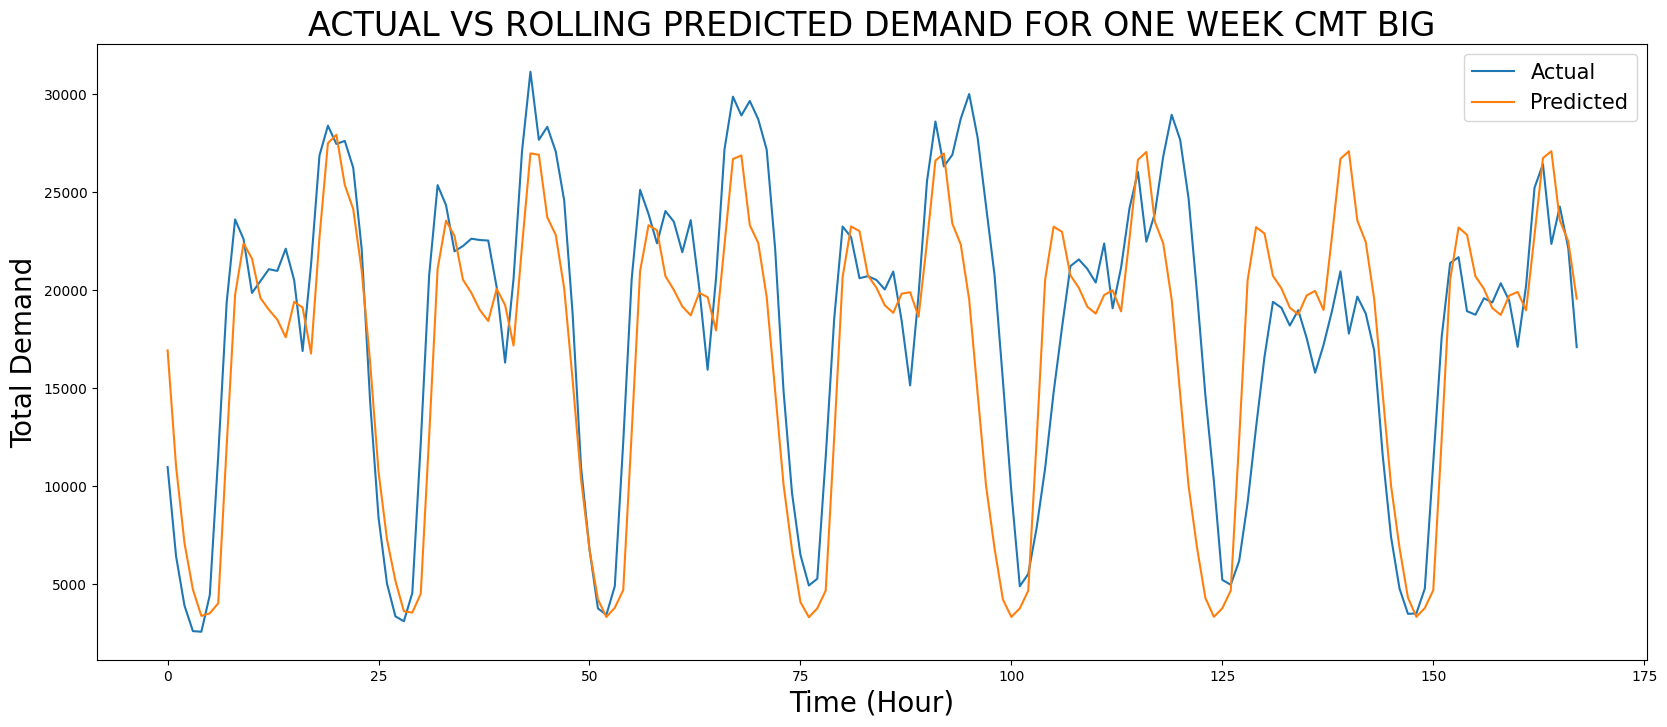

In [22]:
plt.figure(figsize=(20,8))
plt.title('ACTUAL VS ROLLING PREDICTED DEMAND FOR ONE WEEK CMT BIG',fontsize=24)
plt.plot(np.sum(rolling_true,axis=1))
plt.plot(np.sum(rolling_pred_array,axis=1))
plt.legend(['Actual','Predicted'],fontsize=15)
plt.ylabel('Total Demand',fontsize=20)
plt.xlabel('Time (Hour)',fontsize=20)
plt.show()